In [34]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec  5 00:10:24 2019

@author: honglu
"""

import os
import gzip
import pickle
import pandas as pd
import datetime
from datetime import datetime as dt
import pdb
import numpy as np
import time
from IPython.display import Audio, display
import matplotlib.pyplot as plt
%matplotlib inline  

"""
memetracker data cleaner
https://snap.stanford.edu/data/other.html

https://snap.stanford.edu/data/memetracker9.html
"""

'\nmemetracker data cleaner\n\nhttps://snap.stanford.edu/data/memetracker9.html\n'

In [82]:
def create_config():
    config = {
                'rawfiles': ['./raw/memetracker/quotes_2008-08.txt.gz',
                             './raw/memetracker/quotes_2008-09.txt.gz',
                             './raw/memetracker/quotes_2008-10.txt.gz',
                             './raw/memetracker/quotes_2008-11.txt.gz',
                             './raw/memetracker/quotes_2008-12.txt.gz',
                             './raw/memetracker/quotes_2009-01.txt.gz',
                             './raw/memetracker/quotes_2009-02.txt.gz',
                             './raw/memetracker/quotes_2009-03.txt.gz',
                             './raw/memetracker/quotes_2009-04.txt.gz'
                             ],
                'output_path': './data/memetracker_dataset/',

                'site_cutoff': [10000, 101700],
                'meme_cutoff': 5000
             }
    return config


config = create_config()
if not os.path.exists(config['output_path']):
    os.makedirs(config['output_path'])

In [40]:
def code_finished(start_time=None):
    """
    More alarm audio: https://onlineclock.net/sounds/
    """
    display(Audio(url='https://onlineclock.net/audio/options/default.mp3', autoplay=True))
    if start_time is not None:
        if time.time() - start_time > 3600:
            print("took {} h".format(round((time.time() - start_time)/3600.0), 2))
        elif time.time() - start_time > 60:
            print("took {} m".format(round((time.time() - start_time)/60.0), 2))
        else:
            print("took {} s".format(round(time.time() - start_time), 2))

In [32]:
def get_one_cascade_pandas(df, meme):
    df_meme = pd.DataFrame(df.get_group(meme))
    df_meme.sort_values(by=['time'], inplace=True, ascending=True)
    df_meme.drop_duplicates('site')
    return df_meme

In [35]:
"""
Load raw dataset
"""
print(config['rawfiles'])

print("starting reading raw dataset")
lines = []
count = 0
start_time = time.time()
for file in config['rawfiles']:
    with gzip.open(file, 'rt') as f:
        for line in f:
            lines.append(line)
    count += 1
    print(count, len(config['rawfiles']))
    print("took {} min".format(round((time.time() - start_time)/60), 2)
code_finished()

['./raw/memetracker/quotes_2008-08.txt.gz', './raw/memetracker/quotes_2008-09.txt.gz', './raw/memetracker/quotes_2008-10.txt.gz', './raw/memetracker/quotes_2008-11.txt.gz', './raw/memetracker/quotes_2008-12.txt.gz', './raw/memetracker/quotes_2009-01.txt.gz', './raw/memetracker/quotes_2009-02.txt.gz', './raw/memetracker/quotes_2009-03.txt.gz', './raw/memetracker/quotes_2009-04.txt.gz']
starting reading raw dataset
1 9 49.85065698623657
2 9 127.66932964324951
3 9 192.78801226615906
4 9 251.39570689201355
5 9 312.8619713783264
6 9 378.02483201026917
7 9 469.05145049095154
8 9 577.4515564441681
9 9 717.3855712413788


In [38]:
"""
Get site frequency and choose cut off
"""
start_time = time.time()
site_frequency = dict()
for line in lines:
    if line == '\n':
        continue
    [tag, content] = line.split('\n')[0].split('\t')
    if tag == 'P':
        site = content.split('http://')[1].split('/')[0]
        try:
            site_frequency[site] += 1
        except KeyError:
            site_frequency[site] = 1
            

took 0 h


In [41]:
code_finished(start_time)

took 24 m


In [83]:
sort_site_frequency = sorted(list(site_frequency.values()), reverse=True)
print('the number of sites:')
print(len(site_frequency))
print('top 10 sites frequency:')
print(sort_site_frequency[:10])
print('last 10 sites frequency:')
print(sort_site_frequency[-10:])
print('site frequency cut off:')
print(config['site_cutoff'])
print('the number of sites with frequency greater than the smallest cut off:')
print(len(np.where(np.array(sort_site_frequency) > config['site_cutoff'][0])[0]))
print('the number of sites with frequency greater than the largest cut off:')
print(len(np.where(np.array(sort_site_frequency) > config['site_cutoff'][1])[0]))

the number of sites:
1298756
top 10 sites frequency:
[1749657, 941457, 877251, 859114, 822250, 773423, 736205, 729228, 675086, 665197]
last 10 sites frequency:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
site frequency cut off:
[10000, 101700]
the number of sites with frequency greater than the smallest cut off:
1069
the number of sites with frequency greater than the largest cut off:
69


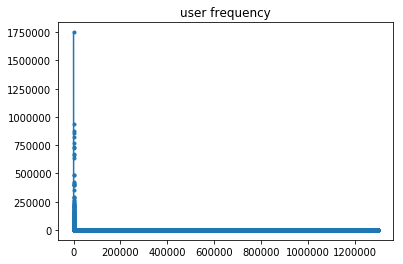

In [86]:
plt.plot(sort_site_frequency, '-', marker='.', label='user frequency')
plt.title('user frequency')
plt.show()

In [84]:
smallest_idx = len(np.where(np.array(sort_site_frequency) > config['site_cutoff'][1])[0])
largest_idx = len(np.where(np.array(sort_site_frequency) > config['site_cutoff'][0])[0])

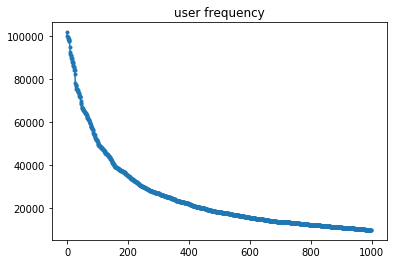

In [85]:
plt.plot(sort_site_frequency[smallest_idx:largest_idx], '-', marker='.', label='user frequency')
plt.title('user frequency')
plt.show()

In [87]:
allsites = set()
for site in site_frequency:
    if (site_frequency[site] >= config['site_cutoff'][0]) and (site_frequency[site] <= config['site_cutoff'][1]):
        allsites.add(site)
print("allsites len:")
print(len(allsites))

allsites len:
1000
